# Tutorial on Intrinsic dimension estimation

In [2]:
import time
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dadapy import data
from dadapy.plot import plot_SLAn, plot_MDS, plot_matrix, get_dendrogram, plot_DecGraph


%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

In [3]:

# import a test set
X = np.random.multivariate_normal([0, 0], [[1, 0.9999],[ 0.9999, 1]], size = (2000,))


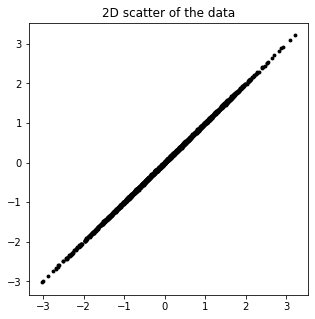

In [4]:
plt.figure(figsize = (5, 5))
plt.title('2D scatter of the data')
plt.scatter(X[:,0],X[:,1],s=15.,alpha=1.0,c='black',linewidths=0.0)
plt.show()

## TwoNN estimator

In [5]:
# initialise the Data class
_data = data.Data(X)

In [6]:
# estimate ID
_data.compute_id_2NN()


(2.0726265795619607, 0.0, 0.008132416466959431)

In [7]:
#ids_scaling, ids_scaling_std, r2s_scaling = _data.return_id_scaling_2NN(N_min = 10)

In [8]:
#plt.errorbar(r2s_scaling, ids_scaling, ids_scaling_std)

## Scale analysis of the intrinsic dimansion: twoNN vs gride

In [13]:
from urllib.request import urlretrieve
from collections import namedtuple
from os.path import exists
import numpy as np

def fetch_data(data_path, data_url, force_download = True):
    if not exists(data_path) or force_download:
        print(f"downloading data from {data_url} to {data_path}")
        urlretrieve(data_url, data_path)
        dataset = np.load(data_path)
    else:
        dataset = np.load(data_path)
    return dataset

RemoteFileMetadata = namedtuple("RemoteFileMetadata", ["filename", "url"])
isolet = RemoteFileMetadata(filename= 'isolet_float32.npy', url='https://figshare.com/ndownloader/files/34882686')
mnist = RemoteFileMetadata(filename= 'mnist.npy', url= 'https://figshare.com/ndownloader/files/34882689')

isolet_data = fetch_data(f'./datasets/{isolet.filename}', isolet.url, force_download = False)
print(f'isolet shape: N data x P features = {isolet_data.shape}')

mnist_data = fetch_data(f'./datasets/{mnist.filename}', mnist.url, force_download = False)
mnist_data = mnist_data.astype('float')
print(f'mnist 1 digit shape: N data x P features = {mnist_data.shape}')

downloading data from https://figshare.com/ndownloader/files/34882686 to ./datasets/isolet_float32.npy
isolet shape: N data x P features = (7797, 617)
downloading data from https://figshare.com/ndownloader/files/34882689 to ./datasets/mnist.npy
mnist 1 digit shape: N data x P features = (6742, 784)


In [8]:
from dadapy import data
def compute_ids_scaling(X):
    "instantiate data class"
    _data = data.Data(coordinates = X, 
                     maxk = 100)
    "compute ids scaling gride"
    ids_gride, ids_err_gride, rs_gride = _data.return_id_scaling_gride(range_max=2048)
    "compute ids with twoNN + decimation"
    ids_twoNN, ids_err_twoNN, rs_twoNN = _data.return_id_scaling_2NN(N_min = 20)
    return ids_gride, ids_twoNN


"this may take from 10 to 20 seconds"
ids_isolet_gride, ids_isolet_twoNN, = compute_ids_scaling(isolet_data)
ids_mnist_gride, ids_mnist_twoNN,  =compute_ids_scaling(mnist_data)

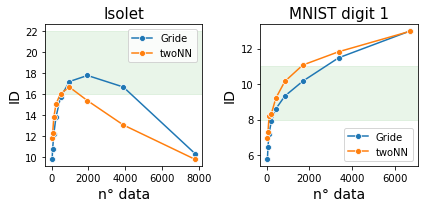

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (6, 3))
gs = GridSpec(1,2)

ax = fig.add_subplot(gs[0])
xrange = min(len(ids_isolet_gride), len(ids_isolet_twoNN))
x = isolet_data.shape[0]/np.array([2**i for i in range(xrange)])
sns.lineplot(ax = ax, x=x, y = ids_isolet_gride[:xrange], label = 'Gride', marker = 'o')
sns.lineplot(ax = ax, x=x, y = ids_isolet_twoNN[:xrange], label = 'twoNN', marker = 'o')
ax.legend(fontsize = 10)
#ax.set_xscale('log')
ax.set_title('Isolet', fontsize = 15)
ax.set_ylabel('ID', fontsize = 14)
ax.set_xlabel('n° data', fontsize = 14)
ax.axhspan(16, 22, color = 'C2', alpha = 0.1)

ax = fig.add_subplot(gs[1])
xrange = min(len(ids_mnist_gride), len(ids_mnist_twoNN))
x = mnist_data.shape[0]/np.array([2**i for i in range(xrange)])
sns.lineplot(ax = ax, x=x, y = ids_mnist_gride[:xrange], label = 'Gride', marker = 'o')
sns.lineplot(ax = ax, x=x, y = ids_mnist_twoNN[:xrange], label = 'twoNN', marker = 'o')
ax.legend(fontsize = 10)
#ax.set_xscale('log')
ax.set_title('MNIST digit 1', fontsize = 15)
ax.set_ylabel('ID', fontsize = 14)
ax.set_xlabel('n° data', fontsize = 14)
ax.axhspan(8, 11, color = 'C2', alpha = 0.1)

gs.tight_layout(fig)
